In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import os
from tqdm import tqdm

# Converting text file into dataframe

In [8]:
path = '/kaggle/input/crop-and-weed-detection-data-with-bounding-boxes/agri_data/data/'

In [9]:
data = [os.path.join(path,x) for x in os.listdir(path)]

In [10]:
images = [data[x] for x in range(len(data)) if data[x].endswith('.jpeg')]

In [11]:
labels = [data[x] for x in range(len(data)) if data[x].endswith('.txt')]

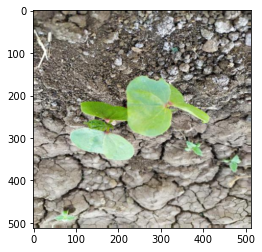

In [12]:
#checking our conversion is working or not
plt.imshow(cv2.cvtColor(cv2.imread(images[0]),cv2.COLOR_BGR2RGB))

In [13]:
import pandas as pd
from tqdm import tqdm

data = []  # List to hold the data before creating the DataFrame

for id in tqdm(images):
    with open(id[:-5] + '.txt', 'r') as label_file:
        cleaned_label = label_file.read().strip().split('\n')

    for name in cleaned_label:
        if name:  # Check if the line is not empty
            ind_label = name.split(' ')
            data.append({
                'image_name': id[78:],  # Extracting the image name
                'object': int(ind_label[0]),
                'x_cen': float(ind_label[1]),
                'y_cen': float(ind_label[2]),
                'w': float(ind_label[3]),
                'h': float(ind_label[4])
            })

# Create DataFrame from the list of dictionaries
df = pd.DataFrame(data)


100%|██████████| 1300/1300 [00:04<00:00, 318.41it/s]


In [14]:
df.sample(10)

,image_name,object,x_cen,y_cen,w,h
1309,agri_0_3388.jpeg,1,0.508789,0.525391,0.607422,0.468750
188,agri_0_14.jpeg,0,0.419922,0.791016,0.078125,0.066406
913,agri_0_2774.jpeg,0,0.803711,0.150391,0.111328,0.160156
457,agri_0_1750.jpeg,0,0.486328,0.573242,0.910156,0.494141
135,agri_0_4388.jpeg,1,0.125977,0.694336,0.205078,0.306641
1944,agri_0_7806.jpeg,1,0.533203,0.548828,0.746094,0.871094
738,agri_0_8417.jpeg,1,0.451172,0.494141,0.449219,0.515625
1097,agri_0_5401.jpeg,0,0.229492,0.642578,0.220703,0.078125
941,agri_0_5686.jpeg,1,0.632812,0.256836,0.574219,0.361328
81,agri_0_4033.jpeg,0,0.487305,0.490234,0.931641,0.917969


# Converting dataframe into Pascal-voc format

In [15]:
#column name for pascal-voc dataframe
column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']

In [16]:
import pandas as pd
from tqdm import tqdm

# Assuming `df` and `column_name` are already defined
pascal_voc_data = []  # List to hold the data before creating the DataFrame

for i in tqdm(range(len(df))):
    entry = {
        'filename': df.loc[i, 'image_name'],
        'width': 512,
        'height': 512,
        'class': 'crop' if df.loc[i, 'object'] == 0 else 'weed',
        'xmin': int((df.loc[i, 'x_cen'] - df.loc[i, 'w'] / 2) * 512),
        'ymin': int((df.loc[i, 'y_cen'] - df.loc[i, 'h'] / 2) * 512),
        'xmax': int((df.loc[i, 'x_cen'] + df.loc[i, 'w'] / 2) * 512),
        'ymax': int((df.loc[i, 'y_cen'] + df.loc[i, 'h'] / 2) * 512),
    }
    pascal_voc_data.append(entry)

# Create DataFrame from the list of dictionaries
pascal_voc = pd.DataFrame(pascal_voc_data)

# Display the DataFrame
print(pascal_voc)


100%|██████████| 2072/2072 [00:00<00:00, 5538.73it/s]

              filename  width  height class  xmin  ymin  xmax  ymax
0     agri_0_7209.jpeg    512     512  weed    77   151   427   366
1     agri_0_6978.jpeg    512     512  crop    77    36   448   476
2     agri_0_9299.jpeg    512     512  crop    23    67   480   336
3     agri_0_8085.jpeg    512     512  crop    81   122   446   419
4     agri_0_8482.jpeg    512     512  crop    26    79   428   464
...                ...    ...     ...   ...   ...   ...   ...   ...
2067  agri_0_6270.jpeg    512     512  crop    90    53   460   350
2068  agri_0_6523.jpeg    512     512  crop    93   127   411   418
2069   agri_0_270.jpeg    512     512  weed    54   124   405   476
2070  agri_0_2332.jpeg    512     512  crop    27    34   489   404
2071  agri_0_8252.jpeg    512     512  weed   188   150   404   300

[2072 rows x 8 columns]


In [17]:
pascal_voc

,filename,width,height,class,xmin,ymin,xmax,ymax
0,agri_0_7209.jpeg,512,512,weed,77,151,427,366
1,agri_0_6978.jpeg,512,512,crop,77,36,448,476
2,agri_0_9299.jpeg,512,512,crop,23,67,480,336
3,agri_0_8085.jpeg,512,512,crop,81,122,446,419
4,agri_0_8482.jpeg,512,512,crop,26,79,428,464
...,...,...,...,...,...,...,...,...
2067,agri_0_6270.jpeg,512,512,crop,90,53,460,350
2068,agri_0_6523.jpeg,512,512,crop,93,127,411,418
2069,agri_0_270.jpeg,512,512,weed,54,124,405,476
2070,agri_0_2332.jpeg,512,512,crop,27,34,489,404


# Visualizing labels

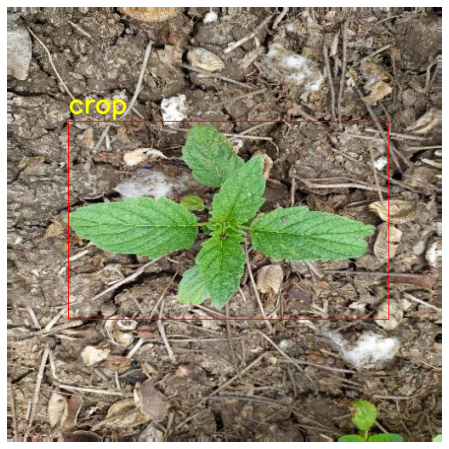

In [18]:
import cv2
import matplotlib.pyplot as plt

# Change this index to display a different image
any_index_number = 5

# Read the image and convert it to RGB
image_path = path + pascal_voc.loc[any_index_number, 'filename']
test_img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

# Filter DataFrame for the specific image
test_df = pascal_voc[pascal_voc['filename'] == pascal_voc.loc[any_index_number, 'filename']].reset_index(drop=True)

# Draw rectangles and add text for each detection
for _, row in test_df.iterrows():
    # Draw the bounding box
    cv2.rectangle(test_img, 
                  (row['xmin'], row['ymin']), 
                  (row['xmax'], row['ymax']), 
                  (255, 0, 0), 
                  thickness=1)
    
    # Put the class label above the bounding box
    cv2.putText(test_img, 
                row['class'], 
                (row['xmin'], row['ymin'] - 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 
                fontScale=1, 
                color=(255, 255, 0), 
                thickness=2, 
                lineType=cv2.LINE_AA)

# Display the image
plt.figure(figsize=(8, 8))
plt.imshow(test_img)
plt.axis('off')
plt.show()


In [19]:
# Specify the output filename
output_filename = 'pascal_voc_format.csv'

# Use a context manager to ensure the file is handled properly
with open(output_filename, 'w', newline='') as file:
    pascal_voc.to_csv(file, index=False)

print(f'Data successfully saved to {output_filename}')


Data successfully saved to pascal_voc_format.csv


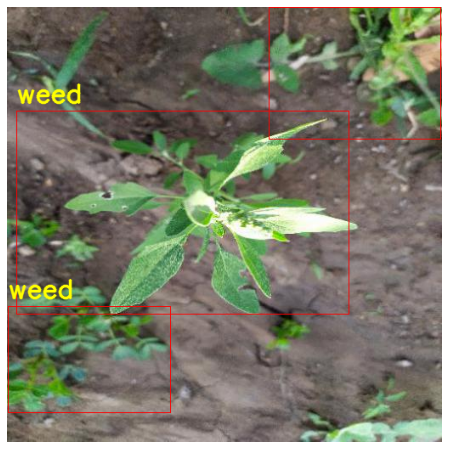

In [21]:
any_index_number = 55 #change this number for different images
test_img = cv2.cvtColor(cv2.imread(path+pascal_voc.loc[any_index_number,'filename']),cv2.COLOR_BGR2RGB)
test_df = pascal_voc[pascal_voc['filename']==pascal_voc.loc[any_index_number,'filename']].reset_index(drop=True)
for i in range(len(test_df)):
    
    rec = cv2.rectangle(test_img, (test_df.loc[i,'xmin'],test_df.loc[i,'ymin']), (test_df.loc[i,'xmax'],test_df.loc[i,'ymax']), (255,0,0), 1, 1) 
    text = cv2.putText(rec, test_df.loc[i,'class'], (test_df.loc[i,'xmin'],test_df.loc[i,'ymin']-10), cv2.FONT_HERSHEY_SIMPLEX,1, (255,255,0), 2, cv2.LINE_AA)
    
plt.figure(figsize=(8,8))    
plt.imshow(text)
plt.axis('off')
plt.show()

In [23]:
import keras
keras.__version__
from keras import layers
from keras import models
from keras import optimizers

Using TensorFlow backend.


In [24]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150,150,3))) #(3 canales iniciales*32 nodos*3pix*3pix)+32 bias= 896 param
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) #(32 nodos posteriores*64 nodos*3pix*3pix)+64 bias= 18496 param
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu')) #(64 nodos posteriores*128 nodos*3pix*3pix)+128 bias= 73856 param
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu')) #(128 nodos posteriores*128 nodos*3pix*3pix)+128 bias= 147584 param
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten()) #7*7*128 del max pooling anterior
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu')) #(6272 de la capa anterior *512 capa densa)+512 bias = 3211776
model.add(layers.Dense(4, activation='softmax')) #(512 capa anterior*4 capa densa)+4 bias = 2052
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [28]:
import os

path = '/kaggle/input/crop-and-weed-detection-data-with-bounding-boxes/agri_data/data/'
print(os.listdir(path))


['agri_0_7209.jpeg', 'agri_0_6978.jpeg', 'agri_0_9299.jpeg', 'agri_0_9032.txt', 'agri_0_8733.txt', 'agri_0_6120.txt', 'agri_0_4362.txt', 'agri_0_9055.txt', 'agri_0_2495.txt', 'agri_0_9095.txt', 'agri_0_8085.jpeg', 'agri_0_8482.jpeg', 'agri_0_3928.txt', 'agri_0_3900.txt', 'agri_0_9584.jpeg', 'agri_0_4972.txt', 'agri_0_9927.jpeg', 'agri_0_1258.txt', 'agri_0_3398.jpeg', 'agri_0_8585.txt', 'agri_0_2551.txt', 'agri_0_9612.txt', 'agri_0_4499.txt', 'agri_0_6776.txt', 'agri_0_8980.txt', 'agri_0_6814.txt', 'agri_0_7362.jpeg', 'agri_0_8682.jpeg', 'agri_0_7070.txt', 'agri_0_82.jpeg', 'agri_0_6222.jpeg', 'agri_0_3075.txt', 'agri_0_7072.txt', 'agri_0_2469.jpeg', 'agri_0_4383.jpeg', 'agri_0_4718.jpeg', 'agri_0_1841.txt', 'agri_0_8209.jpeg', 'agri_0_84.jpeg', 'agri_0_2863.txt', 'agri_0_9132.txt', 'agri_0_4419.txt', 'agri_0_4951.txt', 'agri_0_2876.txt', 'agri_0_1317.jpeg', 'agri_0_3442.jpeg', 'agri_0_2681.txt', 'agri_0_7266.txt', 'agri_0_2363.txt', 'agri_0_8995.txt', 'agri_0_9810.txt', 'agri_0_4789.jp

In [31]:
import os
import shutil
import random

# Define paths
main_path = '/kaggle/input/crop-and-weed-detection-data-with-bounding-boxes/agri_data/data/'
train_path = '/kaggle/working/train/'
val_path = '/kaggle/working/val/'

# Create class directories
classes = ['crop', 'weed']
for cls in classes:
    os.makedirs(os.path.join(train_path, cls), exist_ok=True)
    os.makedirs(os.path.join(val_path, cls), exist_ok=True)

# List all images
images = [f for f in os.listdir(main_path) if f.endswith('.jpeg')]  # Adjust if needed

# Shuffle images and split into training and validation sets
random.shuffle(images)
split_ratio = 0.8
split_index = int(len(images) * split_ratio)

train_images = images[:split_index]
val_images = images[split_index:]

# Move images to their respective class directories
for img in train_images:
    label = 'crop' if 'crop' in img else 'weed'  # Adjust based on your naming convention
    shutil.copy(os.path.join(main_path, img), os.path.join(train_path, label, img))

for img in val_images:
    label = 'crop' if 'crop' in img else 'weed'  # Adjust based on your naming convention
    shutil.copy(os.path.join(main_path, img), os.path.join(val_path, label, img))

print(f'Training images: {len(train_images)}')
print(f'Validation images: {len(val_images)}')


Training images: 1040
Validation images: 260


In [32]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/kaggle/working/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)

validation_generator = val_datagen.flow_from_directory(
    '/kaggle/working/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)



Found 2600 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


Found 3034 images belonging to 2 classes.
Found 3034 images belonging to 2 classes.
Epoch 1/10
94/94 [==============================] - 141s 2s/step - loss: 0.6080 - accuracy: 0.7542 - val_loss: 0.5944 - val_accuracy: 0.7563
Epoch 2/10
94/94 [==============================] - 143s 2s/step - loss: 0.5623 - accuracy: 0.7565 - val_loss: 0.5204 - val_accuracy: 0.7562
Epoch 3/10
94/94 [==============================] - 143s 2s/step - loss: 0.5595 - accuracy: 0.7578 - val_loss: 0.6312 - val_accuracy: 0.7595
Epoch 4/10
94/94 [==============================] - 142s 2s/step - loss: 0.5534 - accuracy: 0.7598 - val_loss: 0.6065 - val_accuracy: 0.7575
Epoch 5/10
94/94 [==============================] - 141s 2s/step - loss: 0.5609 - accuracy: 0.7542 - val_loss: 0.5629 - val_accuracy: 0.7518
Epoch 6/10
94/94 [==============================] - 142s 2s/step - loss: 0.5558 - accuracy: 0.7572 - val_loss: 0.5646 - val_accuracy: 0.7628
Epoch 7/10
94/94 [==============================] - 141s 1s/step - los

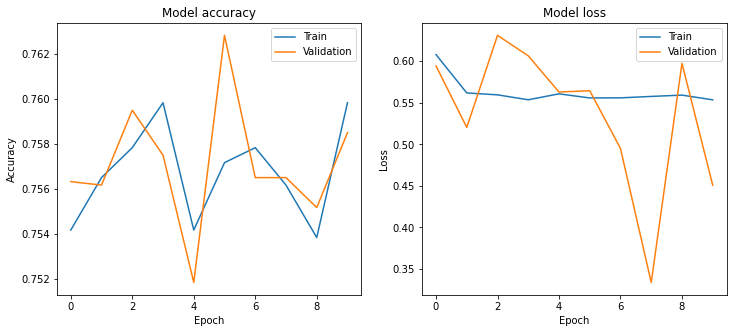

In [33]:
import os
import random
import shutil
import matplotlib.pyplot as plt
from keras import layers, models
from keras.preprocessing.image import ImageDataGenerator

# Define paths
main_path = '/kaggle/input/crop-and-weed-detection-data-with-bounding-boxes/agri_data/data/'
train_path = '/kaggle/working/train/'
val_path = '/kaggle/working/val/'

# Create class directories
classes = ['crop', 'weed']
for cls in classes:
    os.makedirs(os.path.join(train_path, cls), exist_ok=True)
    os.makedirs(os.path.join(val_path, cls), exist_ok=True)

# List all images
images = [f for f in os.listdir(main_path) if f.endswith('.jpeg')]
random.shuffle(images)

# Split images into training and validation sets
split_ratio = 0.8
split_index = int(len(images) * split_ratio)

train_images = images[:split_index]
val_images = images[split_index:]

# Move images to their respective class directories
for img in train_images:
    label = 'crop' if 'crop' in img else 'weed'
    shutil.copy(os.path.join(main_path, img), os.path.join(train_path, label, img))

for img in val_images:
    label = 'crop' if 'crop' in img else 'weed'
    shutil.copy(os.path.join(main_path, img), os.path.join(val_path, label, img))

# Set up ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/kaggle/working/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='sparse'
)

validation_generator = val_datagen.flow_from_directory(
    '/kaggle/working/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='sparse'
)

# Define the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))  # Use 2 for binary classification

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

# Evaluate the model
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()
